

# Prosper Loan Data Report

## by Jinwen Tu




## Dataset overview

Prosper or Prosper Marketplace Inc. is America’s first marketplace lending platform, with over $10 billion in funded loans. It is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. In this dataset, we are using the data from the Posper,which contains 113,937 loans with 81 variables on each loan. 

## Investigation overview

I will focus on the features including CreditGrade, Term, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, ProsperRating, ListingCategory (numeric), EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, OpenRevolvingMonthlyPayment, DelinquenciesLast7Years, BankcardUtilization, DebtToIncomeRatio, IncomeRange, StatedMonthlyIncome, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MonthlyLoanPayment. Based on these features, I will answer two main questions.

## Question 1: 

What factors affect a loan’s outcome status?


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load in the dataset into a pandas dataframe, print statistics
loans_origin = pd.read_csv('prosperLoanData.csv')

In [4]:
loans_origin.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#chose important values for further exploration 

loans = loans_origin[['CreditGrade','Term', 'ListingCreationDate', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss','EstimatedReturn', 'ProsperRating (numeric)', 
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'DelinquenciesLast7Years', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months','BankcardUtilization',
       'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments']]
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 56 columns):
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
ListingCreationDate                    113937 non-null object
LoanStatus                             113937 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha)                  84853 non-null object
ProsperScore                           84853 non-null float64
ListingCategory (numeric)              113937 non-null int64
EmploymentStatus      

In [6]:
#group the borrowers to 5 groups (mild use,medium use,heavy use,super use,no use）according to the BankcardUtilization
#'no use' is used for borrowers showing "o" or "NA" 

oneforth=loans['BankcardUtilization'].quantile(0.25)
twoforth=loans['BankcardUtilization'].quantile(0.5)

def switch_data1(x):
    if 0<x<0.31:
        y='Mild Use'
    elif 0.31<=x<0.6:
        y='Medium Use'
    elif 0.6<=x<=1:
        y='Heavy Use'
    elif x>1:
        y='Super Use'
    else:
        y='No Use'
    return y

loans['BankcardUse']=loans['BankcardUtilization'].apply(switch_data1)

In [7]:
#the credit score systems are different before and after 2009-7-1, so it needs to be seperated according to the LoanOriginationDate
def date_phase(x):
    if x>='2009-07-01':
        y='After 2009'
    else:
        y='Before 2009'
    return y
#add new column to show the difference
loans['DatePhase']=loans['LoanOriginationDate'].apply(date_phase)

In [8]:
#split the ListingCreationDate to year, month, quater and day for further analysis
#change the data type of ListingCreationDate to date

loans['LoanOriginationYear'] = loans['LoanOriginationDate'].str[:4]
loans['LoanOriginationMonth'] = loans['LoanOriginationDate'].str[5:7]
loans['LoanOriginationDay'] = loans['LoanOriginationDate'].str[8:10]
loans['LoanOriginationQtr'] = pd.PeriodIndex(pd.to_datetime(loans['LoanOriginationDate'].str[:7]), freq='Q')
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'].str[:10])
print(loans.LoanOriginationDate.describe())
print(loans.LoanOriginationYear.describe())
print(loans.LoanOriginationMonth.describe())
print(loans.LoanOriginationQtr.describe())
print(loans.LoanOriginationDay.describe())

count                  113937
unique                   1873
top       2014-01-22 00:00:00
freq                      491
first     2005-11-15 00:00:00
last      2014-03-12 00:00:00
Name: LoanOriginationDate, dtype: object
count     113937
unique        10
top         2013
freq       34345
Name: LoanOriginationYear, dtype: object
count     113937
unique        12
top           01
freq       11395
Name: LoanOriginationMonth, dtype: object
count     113937
unique        33
top       2013Q4
freq       14450
Name: LoanOriginationQtr, dtype: object
count     113937
unique        31
top           30
freq        4812
Name: LoanOriginationDay, dtype: object


In [9]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], 
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999',
                                    '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'LoanStatus': ['Current', 'Completed', 'Chargedoff', 'Defaulted', 
                                   'Past Due (1-15 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 
                                   'Past Due (16-30 days)', 'FinalPaymentInProgress',
                                   'Past Due (>120 days)', 'Cancelled']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

### 1. Distribution of Loan status.
The loan status includes Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. To simplify, I regroup the status to Current, Completed, Defaulted and past due. The defaulted rate of the loans is calculated by defaulted number devided by the sum of defaulted loans and completed loans. 

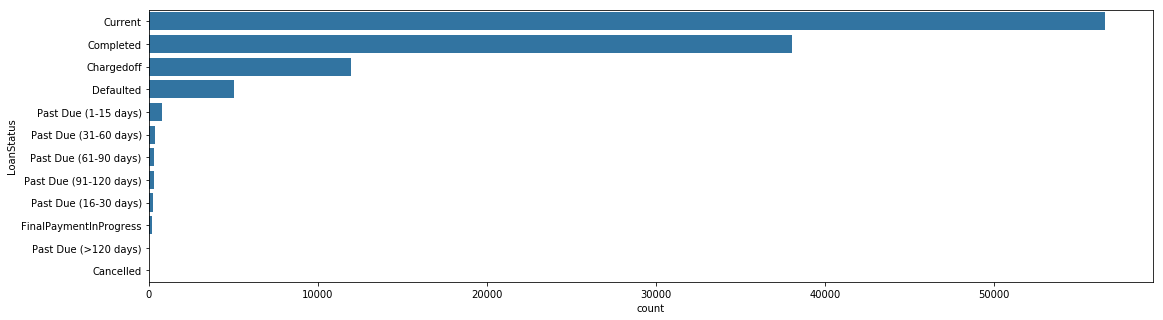

In [10]:
plt.figure(figsize=[18, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'LoanStatus', color = base_color)


In [11]:
# set up new column called Loan_status_new, and combine all the past due loans together
# cancelled loans are only 5, so they are simply excluded

loans=loans[loans['LoanStatus']!='Cancelled']

loans['Loan_status_new'] = 'None'

# iterate through all the rows of df table
for i, row in loans.iterrows():
    if row.LoanStatus == 'Current':
        loans.set_value(i, 'Loan_status_new', row.LoanStatus)
    elif row.LoanStatus == 'Completed':
        loans.set_value(i, 'Loan_status_new', row.LoanStatus)
    elif row.LoanStatus == 'Chargedoff' or row.LoanStatus == 'Defaulted':
        loans.set_value(i, 'Loan_status_new', 'Defaulted')
    else:
        loans.set_value(i, 'Loan_status_new', 'Past due')

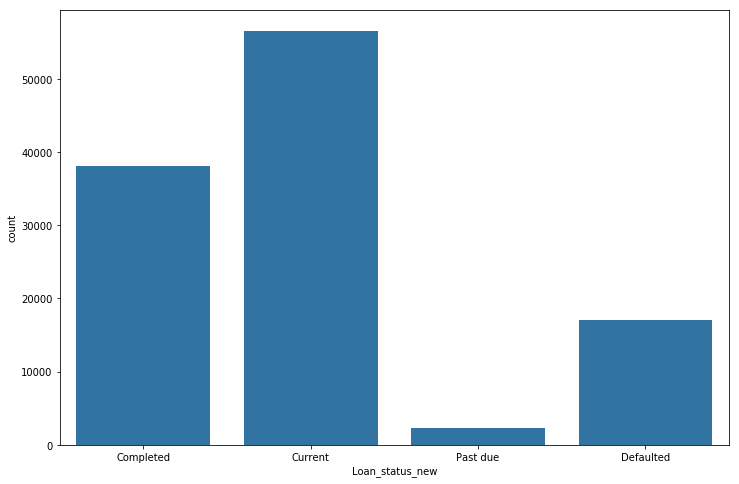

In [12]:
plt.figure(figsize=[12, 8])
base_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'Loan_status_new', color = base_color)

### 2. The relationship between Income range and loan status.

On basis of the data, middle-income people inclinded to have more loans compared to other people owning less or more. On the other hand, the defaulted rate of loans decreases as the income increases. In other words, borrowers with higher income are more likely to complete the loan in time.

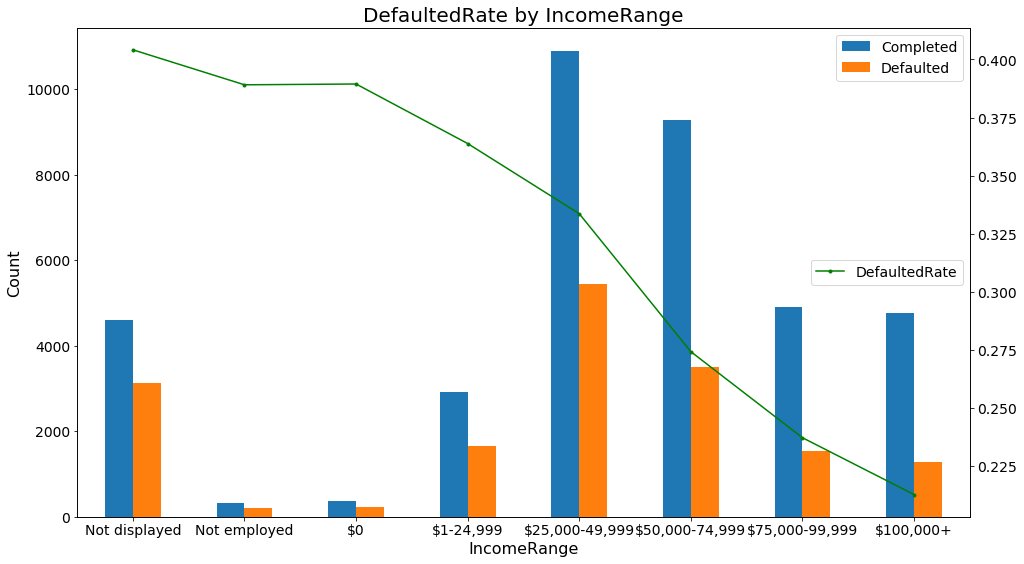

In [13]:
#count using groupby
data1=loans.groupby(['IncomeRange','Loan_status_new'])['Loan_status_new'].count().unstack()
data1=data1.reindex(['Not displayed', 'Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'])
#the percentage of defaulted loans
data1['DefaultedRate']=data1['Defaulted']/(data1['Defaulted']+data1['Completed'])

f,ax1=plt.subplots(figsize=(16,9))
data1[['Completed','Defaulted']].plot(kind='bar',ax=ax1,rot=0,fontsize=14)
ax2=ax1.twinx()
data1['DefaultedRate'].plot(ax=ax2,style='g.-',fontsize=14)
plt.title('DefaultedRate by IncomeRange',fontsize=20)
ax1.set_xlabel('IncomeRange',fontsize=16)
ax1.set_ylabel('Count',fontsize=16)
ax2.legend(loc='center right',fontsize=14)
ax1.legend(fontsize=14)
plt.savefig("DefaultedRate by IncomeRange")

### 3. Relationship between EmploymentStatusDuration and loan status.

Obviously the number of the loans decreases as the employment duration increases. This makes good sense, since the financial situation will be more steady as people are working for longer period of time. On the other hand, there is no obvious correlationship between the defaulted rate of the loans and the employment status duration. 

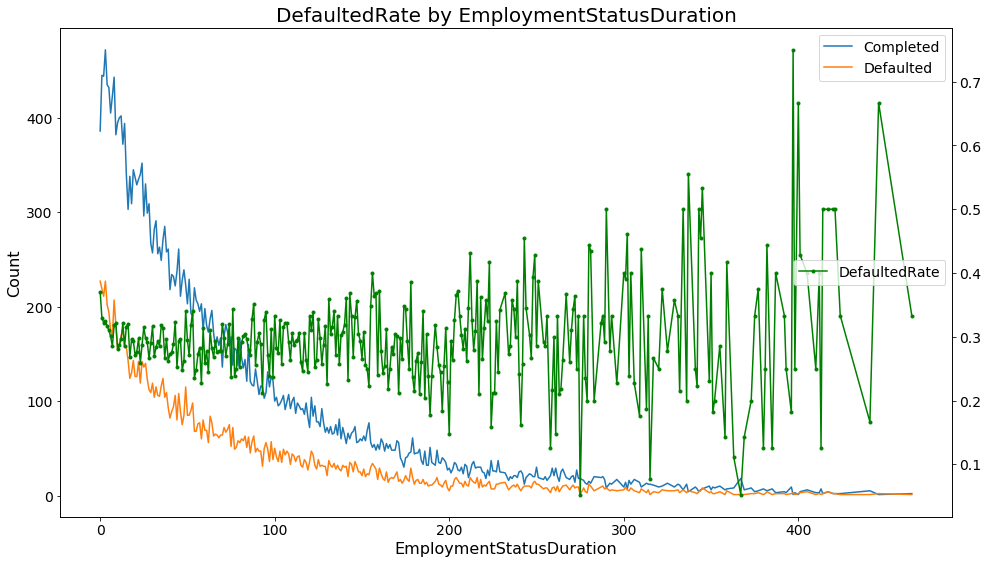

In [26]:
data2=loans.groupby(['EmploymentStatusDuration','Loan_status_new'])['Loan_status_new'].count().unstack()
data2['DefaultedRate']=data2['Defaulted']/(data2['Defaulted']+data2['Completed'])
data2=data2.dropna(how='any',axis=0)
f,ax1=plt.subplots(figsize=(16,9))
data2[columns].plot(kind='line',ax=ax1,rot=0,fontsize=14)
ax1.set_xlabel('EmploymentStatusDuration',fontsize=16)
ax1.set_ylabel('Count',fontsize=16)
ax2=ax1.twinx()
data2['DefaultedRate'].plot(style='g.-',ax=ax2,fontsize=14)
ax1.legend(fontsize=14)
ax2.legend(loc='center right',fontsize=14)
plt.title('DefaultedRate by EmploymentStatusDuration',fontsize=20)
plt.savefig('DefaultedRate by EmploymentStatusDuration')

### 4. Relationship between DebtToIncomeRatio and loan status.

When debt-to-income ratio is smaller than 0.6, the defaulted loans are much less than the completed loans, however, as the ration increases, there is no big difference between defaulted and completed loans. In some cases, the number of defaulted loans can even be higher than completed loans. This figure suggested that it's easy for people with higher debit-to-income ratio to have defaulted loans.

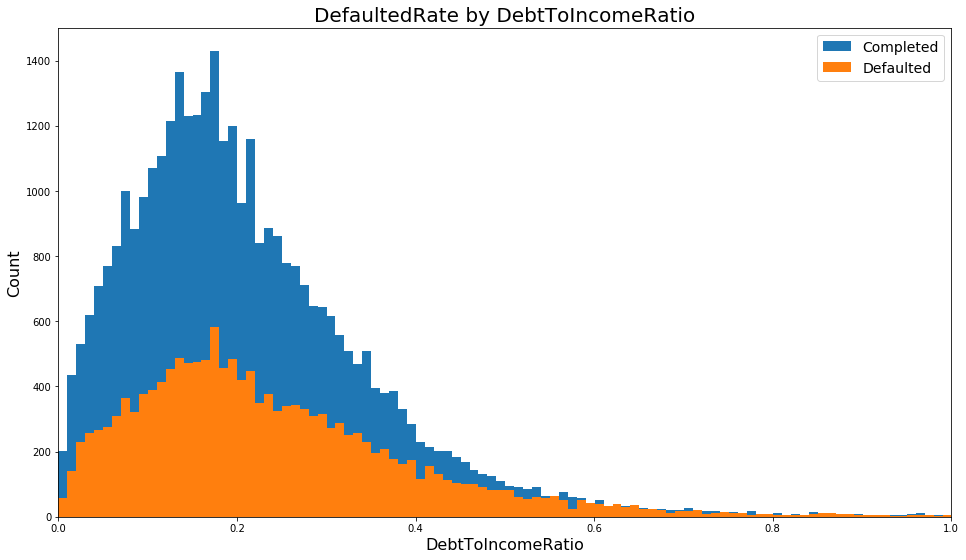

In [16]:
f,ax=plt.subplots(figsize=(16,9))
loans.loc[loans['Loan_status_new']=='Completed','DebtToIncomeRatio'].plot(kind='hist',bins=1000,ax=ax,label='Completed')
loans.loc[loans['Loan_status_new']=='Defaulted','DebtToIncomeRatio'].plot(kind='hist',bins=1000,ax=ax,label='Defaulted')
plt.xlim(0,1)
plt.legend(loc='best',fontsize=14)
ax.set_xlabel('DebtToIncomeRatio',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
ax.set_title('DefaultedRate by DebtToIncomeRatio',fontsize=20)
plt.savefig('DefaultedRate by DebtToIncomeRatio')

### 5. Relationship between BankcardUse and loan status.

Generally speaking, the defaulted rate of the loans increases as the bank card use rate increases. It's worth to note that people who are super users of bankcard have a default rate as high as 50%, suggesting that more strict review and supervision procesure are required for these people. In addition, loans to people missing bank card use details can be risky as well, since the defaulted rate is as high as 40%, suggesting that the information of bank card use is definitely a very important criteria for loan assessment.


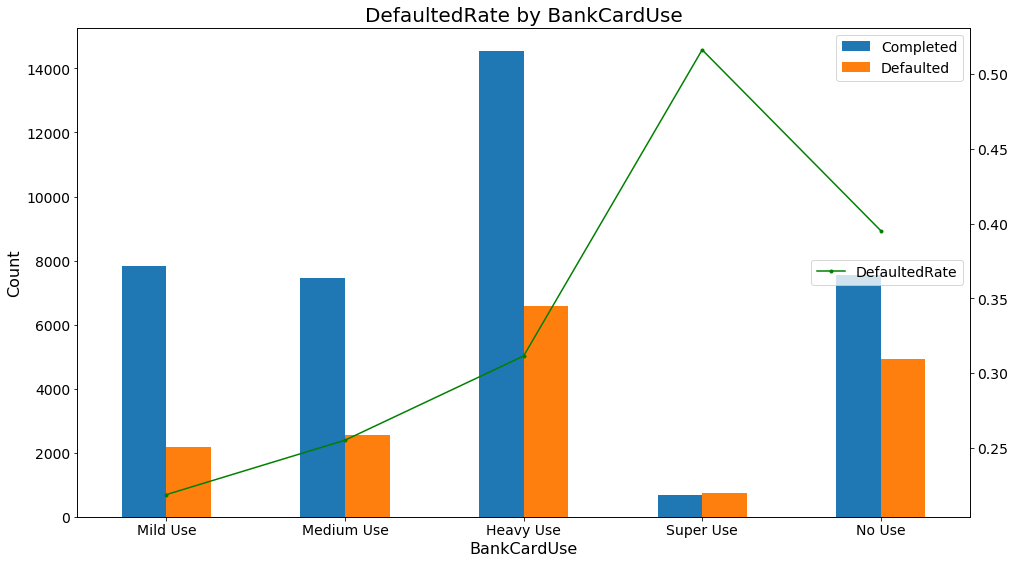

In [18]:
#count the number of defaulted and completed loans when grouped by the bankcarduse values
data3=loans.groupby(['BankcardUse','Loan_status_new'])['Loan_status_new'].count().unstack()
data3=data3.reindex(['Mild Use','Medium Use','Heavy Use','Super Use','No Use'])
columns=['Completed','Defaulted']
#calculate the defaulted percentage
data3['DefaultedRate']=data3['Defaulted']/(data3['Defaulted']+data3['Completed'])

f,ax1=plt.subplots(figsize=(16,9))
data3[columns].plot(kind='bar',ax=ax1,rot=0,fontsize=14)
ax1.set_xlabel('BankCardUse',fontsize=16)
ax1.set_ylabel('Count',fontsize=16)
ax2=ax1.twinx()
data3['DefaultedRate'].plot(style='g.-',ax=ax2,fontsize=14)
ax1.legend(fontsize=14)
ax2.legend(loc='center right',fontsize=14)
plt.title('DefaultedRate by BankCardUse',fontsize=20)
plt.savefig('DefaultedRate by BankCardUse')

### 6. Relationship between Credit rating and loan status (before July 2009).

Before July 2009, credit of the borrowers were rated by CreditGrade. The defaulted rate of loans decreases as the credit grade increases. Majority of the borrowers have a credit grade higher than D;

After July 2009, credit of the borrowers were rated by Prosper rating. The default rate of loans also decreases as the Prosper rating increases. This rating system significantly decreased the defaulted rate of loans, when compared with the credit grade scoring system. 

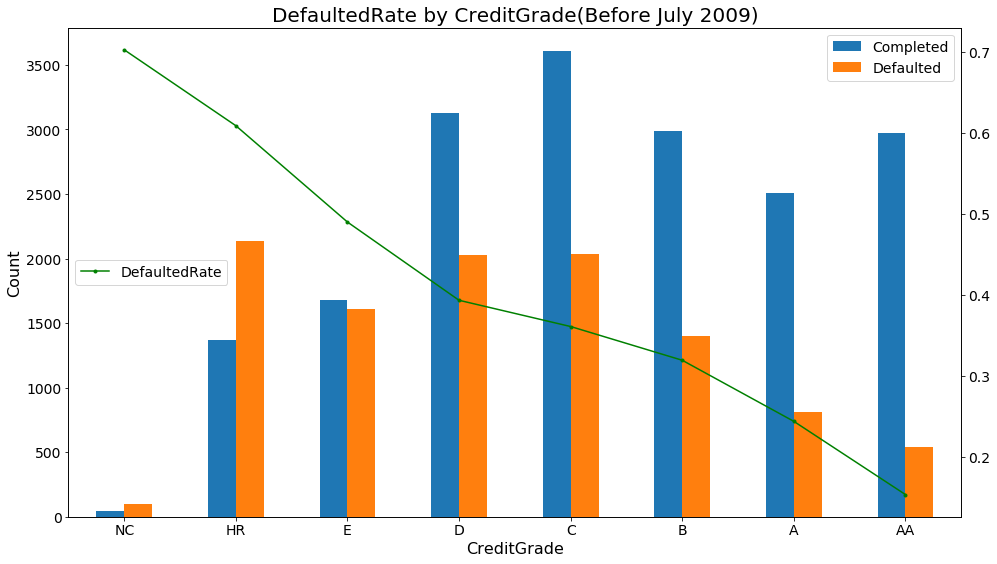

In [19]:
data4=loans.groupby(['CreditGrade','Loan_status_new'])['Loan_status_new'].count().unstack()
data4=data4.reindex(['NC','HR','E','D','C','B','A','AA'])
data4['DefaultedRate']=data4['Defaulted']/(data4['Defaulted']+data4['Completed'])
f,ax1=plt.subplots(figsize=(16,9))
data4[columns].plot(kind='bar',ax=ax1,rot=0,fontsize=14)
ax1.set_xlabel('CreditGrade',fontsize=16)
ax1.set_ylabel('Count',fontsize=16)
ax2=ax1.twinx()
data4['DefaultedRate'].plot(style='g.-',ax=ax2,fontsize=14)
ax1.legend(fontsize=14)
ax2.legend(loc='center left',fontsize=14)
plt.title('DefaultedRate by CreditGrade(Before July 2009)',fontsize=20)
plt.savefig('DefaultedRate by CreditGrade(Before July 2009)')

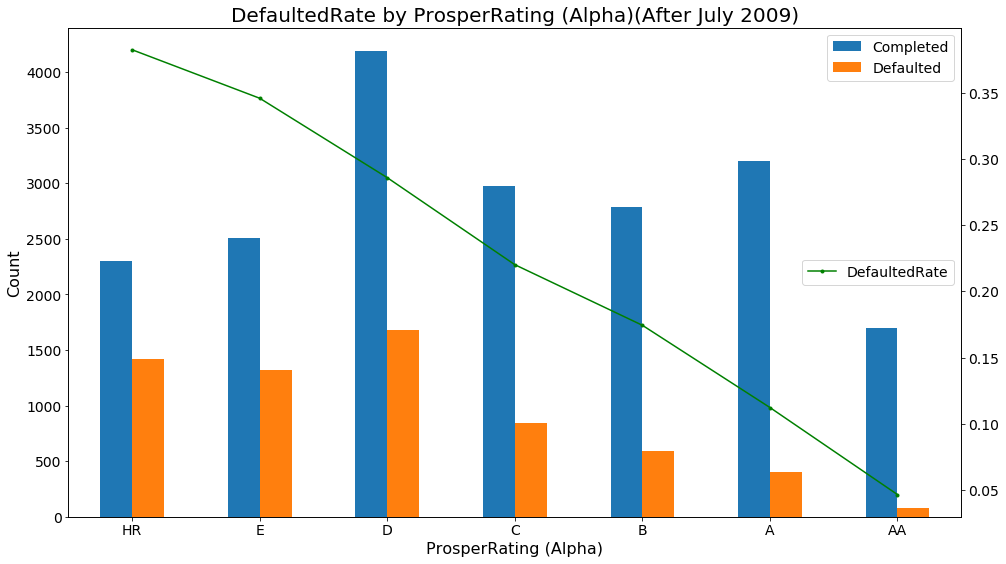

In [20]:
data5=loans.groupby(['ProsperRating (Alpha)','Loan_status_new'])['Loan_status_new'].count().unstack()
data5=data5.reindex(['HR','E','D','C','B','A','AA'])
data5['DefaultedRate']=data5['Defaulted']/(data5['Defaulted']+data5['Completed'])

f,ax1=plt.subplots(figsize=(16,9))
data5[columns].plot(kind='bar',ax=ax1,rot=0,fontsize=14)
ax1.set_xlabel('ProsperRating (Alpha)',fontsize=16)
ax1.set_ylabel('Count',fontsize=16)
ax2=ax1.twinx()
data5['DefaultedRate'].plot(style='g.-',ax=ax2,fontsize=14)
ax1.legend(fontsize=14)
ax2.legend(loc='center right',fontsize=14)
plt.title('DefaultedRate by ProsperRating (Alpha)(After July 2009)',fontsize=20)
plt.savefig('DefaultedRate by ProsperRating (Alpha)(After July 2009)')

### 6. Relationship between DelinquenciesLast7Years and loan status.

As you can image, the defaulted rate of the loans increases as the delinquencies increase.

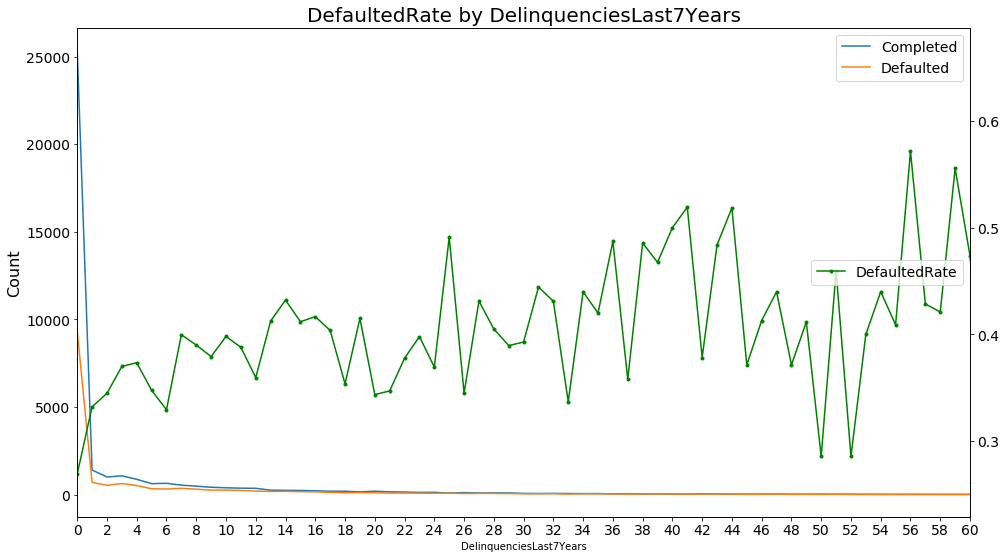

In [21]:
data6=loans.groupby(['DelinquenciesLast7Years','Loan_status_new'])['Loan_status_new'].count().unstack()
data6['DefaultedRate']=data6['Defaulted']/(data6['Defaulted']+data6['Completed'])

f,ax1=plt.subplots(figsize=(16,9))
data6[columns].plot(kind='line',ax=ax1,rot=0,fontsize=14)
ax1.set_xlabel('DelinquenciesLast7Years')
ax1.set_ylabel('Count',fontsize=16)
ax1.set_xticks(range(0,100,2))
ax1.set_xticklabels(range(0,100,2))
ax1.set_xlim(0,60)
ax2=ax1.twinx()
data6['DefaultedRate'].plot(style='g.-',ax=ax2,fontsize=14)
ax1.legend(fontsize=14)
ax2.legend(loc='center right',fontsize=14)
plt.title('DefaultedRate by DelinquenciesLast7Years',fontsize=20)
plt.savefig('DefaultedRate by DelinquenciesLast7Years')

### 7. Relationship between BorrowerAPR and loan status.

Generally speaking, the defaulted rate gradually increases as the BorrowerAPR increases.

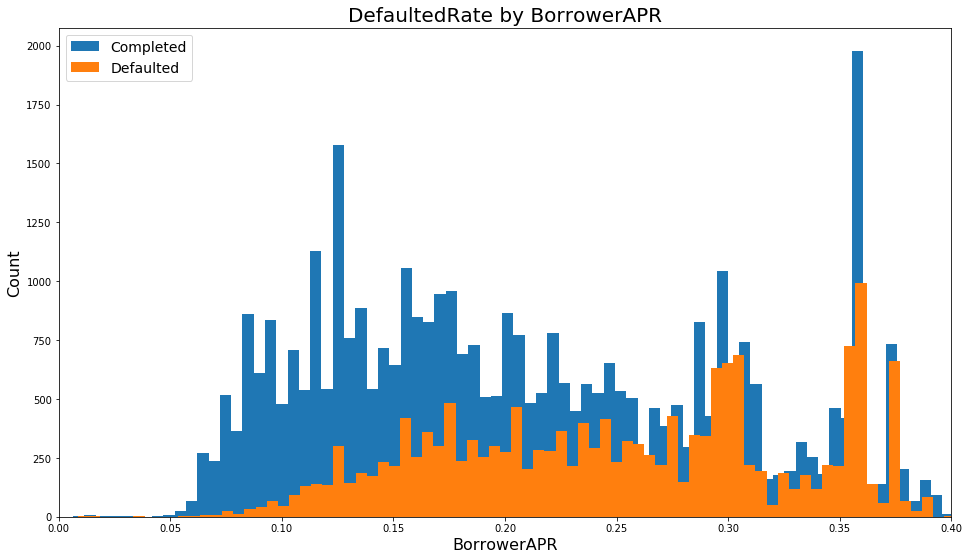

In [22]:
f,ax=plt.subplots(figsize=(16,9))
loans.loc[loans['Loan_status_new']=='Completed','BorrowerAPR'].plot(kind='hist',bins=100,ax=ax,label='Completed')
loans.loc[loans['Loan_status_new']=='Defaulted','BorrowerAPR'].plot(kind='hist',bins=100,ax=ax,label='Defaulted')
plt.xlim(0,0.4)
plt.legend(loc='best',fontsize=14)
ax.set_xlabel('BorrowerAPR',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
ax.set_title('DefaultedRate by BorrowerAPR',fontsize=20)
plt.savefig('DefaultedRate by BorrowerAPR')

### 8. Relationship between LoanOriginalAmount and loan status.

Surprisingly, there is no apparent relationship between LoanOriginalAmount and the defaulted rate.

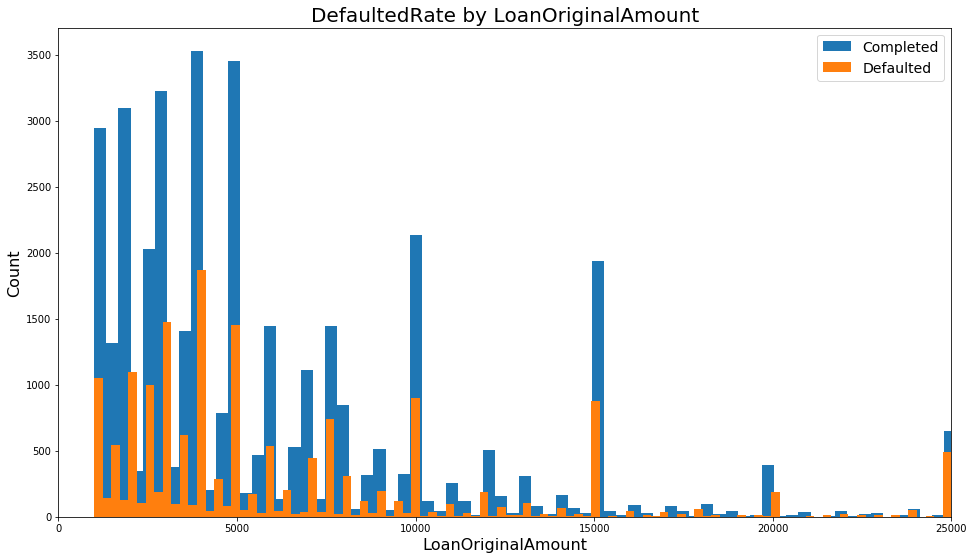

In [23]:
f,ax=plt.subplots(figsize=(16,9))
loans.loc[loans['Loan_status_new']=='Completed','LoanOriginalAmount'].plot(kind='hist',bins=100,ax=ax,label='Completed')
loans.loc[loans['Loan_status_new']=='Defaulted','LoanOriginalAmount'].plot(kind='hist',bins=100,ax=ax,label='Defaulted')
plt.xlim(0,25000)
plt.legend(loc='best',fontsize=14)
ax.set_xlabel('LoanOriginalAmount',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
ax.set_title('DefaultedRate by LoanOriginalAmount',fontsize=20)
plt.savefig('DefaultedRate by LoanOriginalAmount')

## Question 2:

What affects the borrower’s APR or interest rate?


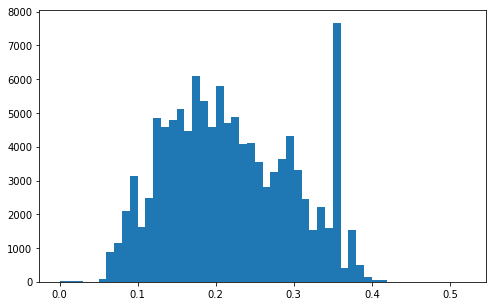

In [24]:
loans['BorrowerAPR'] = loans['BorrowerAPR'].fillna(0.0)

binsize = 0.01
bins = np.arange(0, loans['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins)
plt.show()

### Relationship between BorrowerAPR and DebtToIncomeRatio as well as ProsperRating (Alpha).

Majority of borrower’s APR is normally distributed between 0.05 and 0.4. ‘A’ category loans seem to have a lower APRs and a smaller range of debt-to-income ratios, both of which indicate less risk. The rest of the plot follow the color palette and APR increases as the rating gets riskier. In addition, most people tend to have debt-to-income ratios below 1, regardless of risk category. Also, there is this unusual horizontal line in the ‘HR’ category that extends past 1 and all the way to 1.5, while lower ratings tend to be sparse in the 1.0+ debt-to-income ratio range.

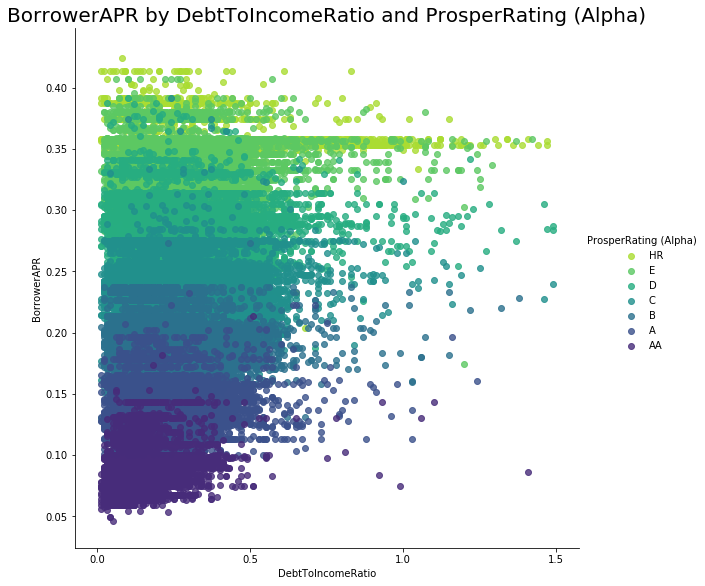

In [25]:
data7=loans[(loans.DebtToIncomeRatio > 0.0) & (loans.DebtToIncomeRatio < 1.5)]
g = sb.FacetGrid(data = data7, hue = 'ProsperRating (Alpha)', palette = 'viridis_r', size = 8)
g = g.map(sb.regplot, 'DebtToIncomeRatio', 'BorrowerAPR', fit_reg = False)
g.add_legend()
plt.xlabel('DebtToIncomeRatio')
plt.xticks([0.0, 0.5, 1.0, 1.5])
plt.ylabel('BorrowerAPR')
plt.title('BorrowerAPR by DebtToIncomeRatio and ProsperRating (Alpha)',fontsize=20)
plt.savefig('BorrowerAPR by DebtToIncomeRatio and ProsperRating (Alpha)')